# Understanding Graph Neural Network
> The basics of graph and graph neural network; taking a peek at DeepChem, a library for life sciences   

- toc:true
- branch: master
- badges: true
- comments: true
- author: Mohamed Arshath
- categories: [gnn, gcn, drug design]

My interest lies in using deep learning to address problems in healthcare and medicine. Previously, we have used deep learning to address computer vision problems in healthcare. In this blog, we will learn Graph Neural Network and how it could be used in medicine such as in drug design/drug discovery. 

Graph/GNN is new to me and the resources below were of great help in understanding these new concepts. 

Resources

https://www.youtube.com/watch?v=fOctJB4kVlM

https://sites.google.com/view/ml-basics/convolution

https://www.youtube.com/watch?v=1miz7yggcTg

# What is Graphs?

Networks or graphs are a general language for describing complex systems of interacting entities. In computer science, the graph is a structured data type that consists of nodes/vertices and edges. G = (V,E)
Some examples of graph data are1. Social network2. interaction between genes and proteins3. economic network4. communication network5. network of neurons

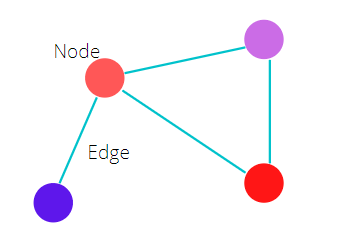


For example, let's assume we are representing a chemical molecule as a graph. We will represent the atoms as nodes and the bonds connecting the atoms as edges. In a social network, the individuals will be represented as nodes and the edges are connections between two individuals. 

Graphs can be directed or non-directed. An example of a directed graph would be representing Twitter data. Individuals are represented as nodes and "following" is represented as edges. Unlike Facebook, Twitter is directed because when Person A follows Person B, Person B need not follow Person A. Hence, this is a directed graph. 

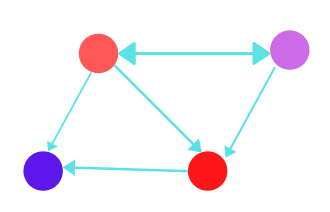

Some concepts of graph
1. they are represented as nodes and edges
2. the edges can be directed
3. the edges can have weights 
4. nodes and edges can have features to describe them. An example of a node feature for a molecule could be - the number of valence electrons, metallic or not, the atomic number, etc. For edges, it could be the type of bond, the number of bonds, etc.
5. labels of nodes can be the same, for example when representing NO2, there will be one N and two Os

How to convert a graph into something that the computer can understand?
1. Adjacency Matrix (A)
 
>An `adjacency matrix` is an NxN (N=Number of nodes) matrix where the elements indicate connections with 1 and non-connection with 0. It is also called a connection matrix. Adjacency Matrix can be weighted.

2. Incidence Matrix (I)

>A matrix of size NxM where N=number of nodes and M=edges of a graph. Indicates if a node and an edge is an incident or not. If a node and an edge is an incident, it will be 1 otherwise 0. For a directed graph, it is the same except when the arrow is away from the node it is 1 and when the arrow is into the node it is -1.

3. Degree Matrix (D)

>A diagonal matrix that contains information about the number of edges connected to a node.

4. Laplacian Matrix

> L = D-A
>It is a measure of smoothness of a vertex - i.e how quickly it changes between adjacent vectors



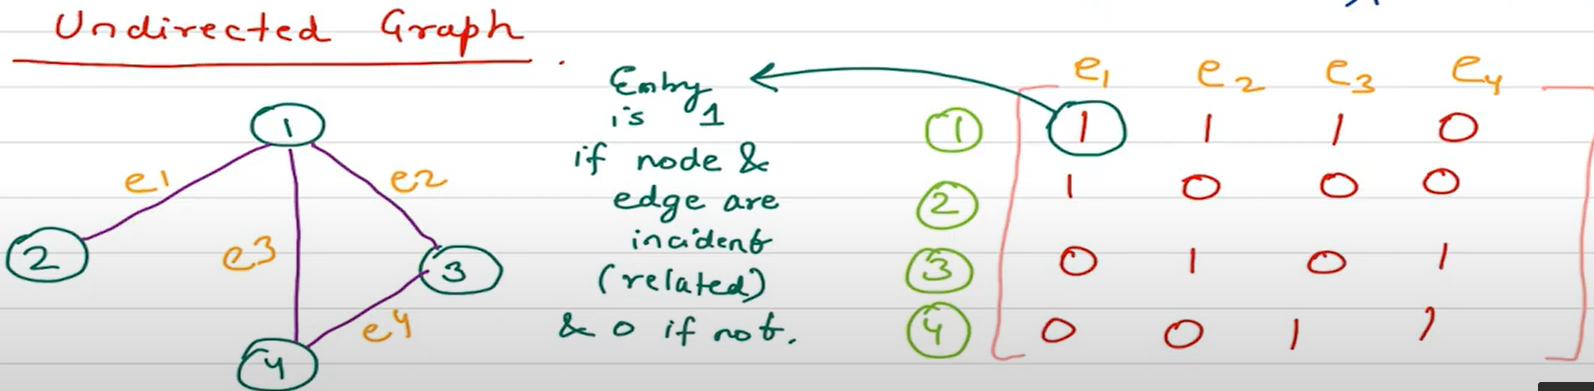
An example of an Incidence Matrix

Source: https://www.youtube.com/watch?v=1miz7yggcTg

## Different Types of Graph ML Problems 


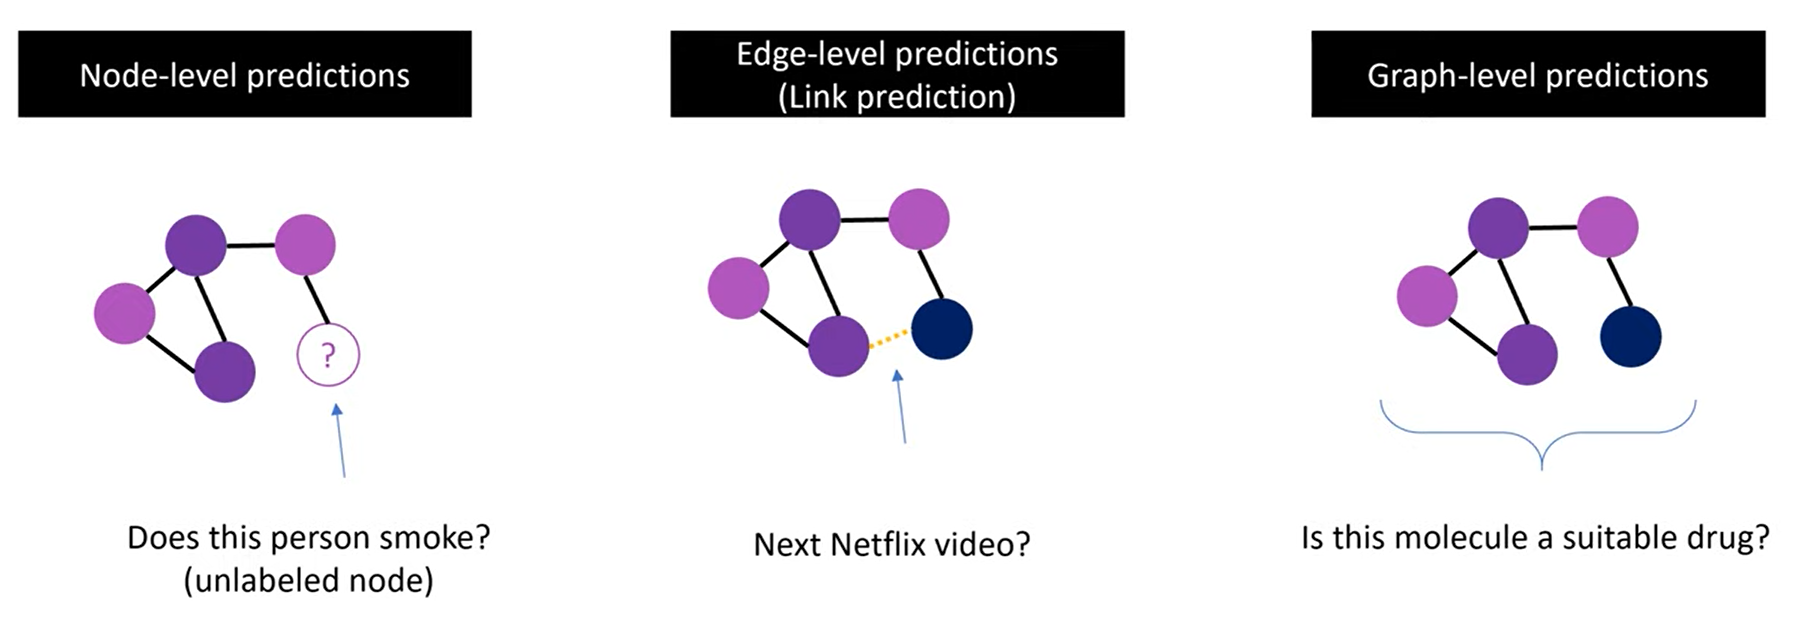

Source: https://www.youtube.com/watch?v=fOctJB4kVlM

## Why we need Graph Neural network? 
 
Why cant we just use general CNN? This is because graph data is different. How are they different?
 
1. Size and shape. The size and shape of graph data change within a dataset. This is also true for other data types such as images but they can be addressed by resizing and padding. This is not possible for graph data.
 
2. Isomorphism. Two graphs that look different can be structurally identical. The neural network that deals with graph data, therefore, needs to be permutation invariant. 
 
3. Grid structure. Graph data are non-euclidean. For images, there is a fixed grid structure but for graphs the structure is dynamic. Graph's Euclidean distance can not be clearly defined.
   
4. Node ordering. No fixed node ordering.  


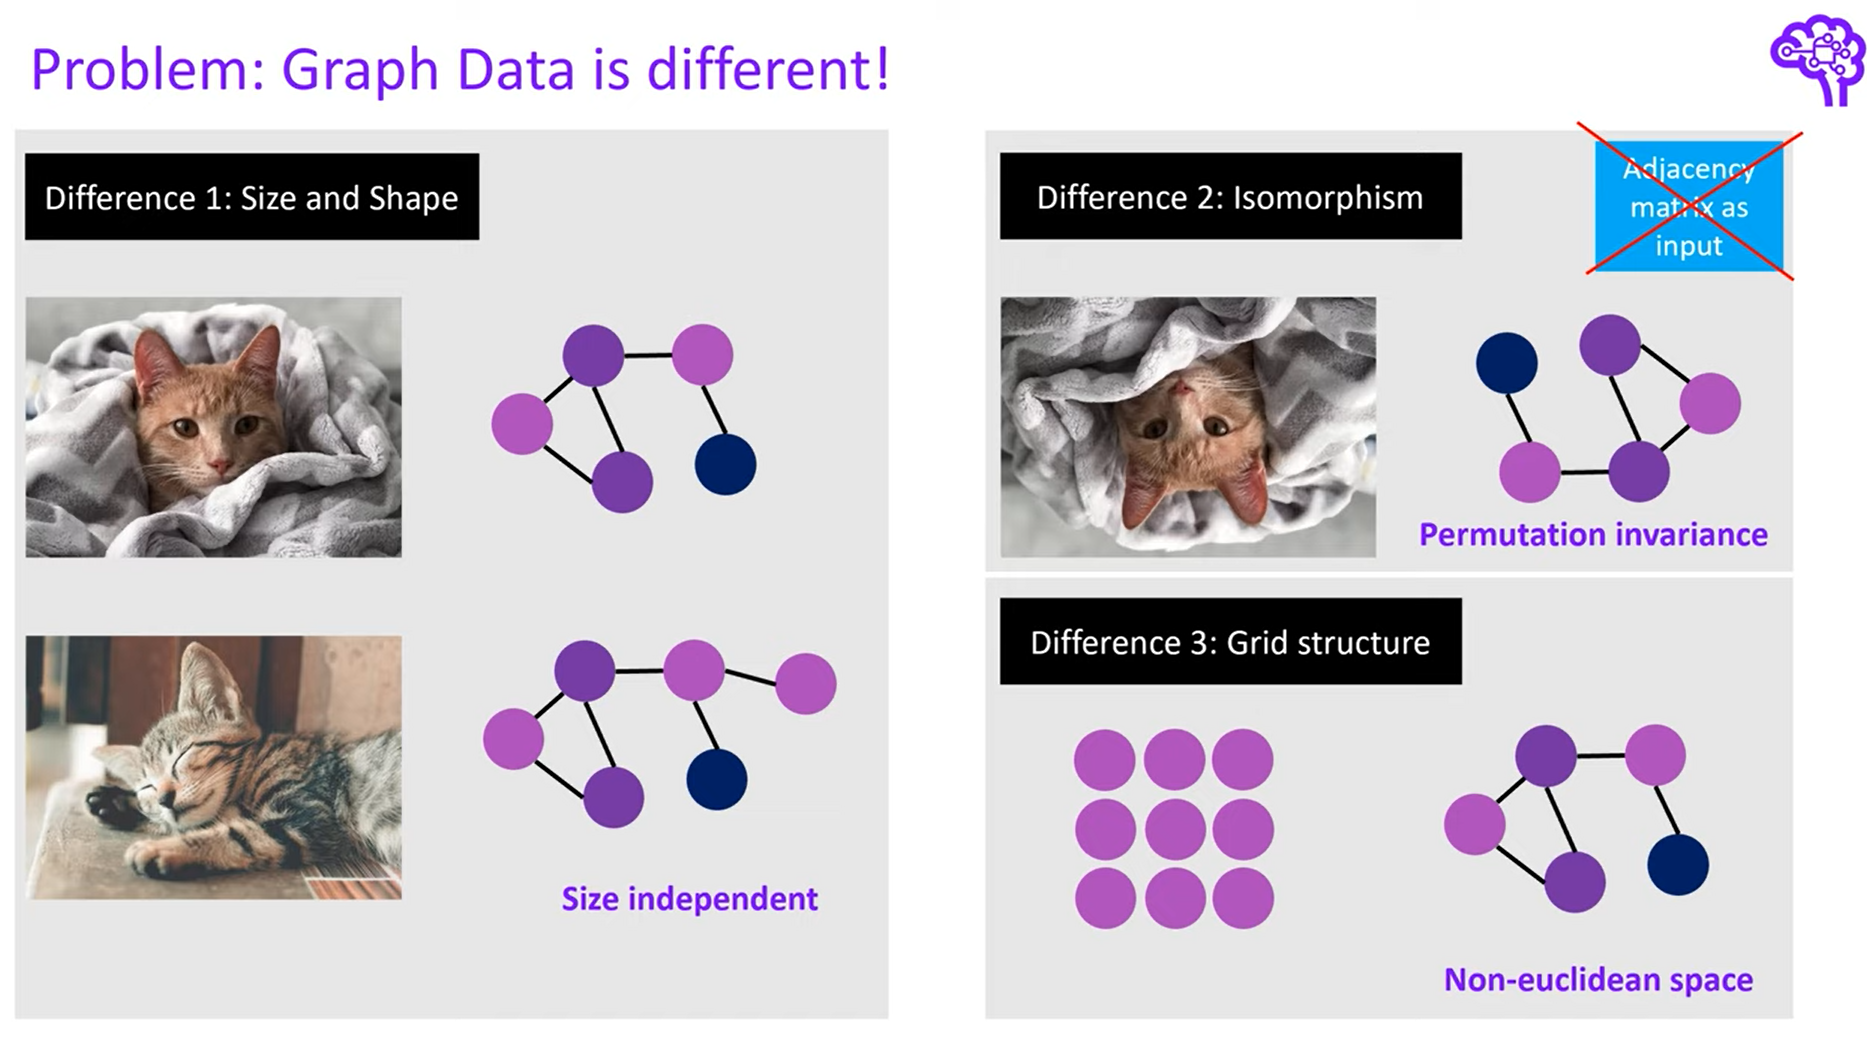
Source: https://www.youtube.com/watch?v=fOctJB4kVlM

# Graph Neural Network

Due to the problems described above, we need a different way to work with graph data.
 
A Graph Convolutional Network (GCN) uses the information from the adjacency matrix and node features to output representation or node embedding for each of the nodes. Each node embeddings contains structural as well as feature information about other nodes in the graph. So the node embedding captures information about other nodes, the connection to this node, and the context in the graph. These node embeddings can be used to make predictions depending on the problem we are trying to solve. The node embeddings are similar to feature maps in CNNs. The embedding size is a hyperparameter similar to feature maps. 
 
Other names for GNN - Geometric NN, representation learning.
 
The image below captures how, in GCN, the adjacency matric and node features are transformed into  Node Embeddings that are used in prediction. This is done through the Message Passing Layers. 




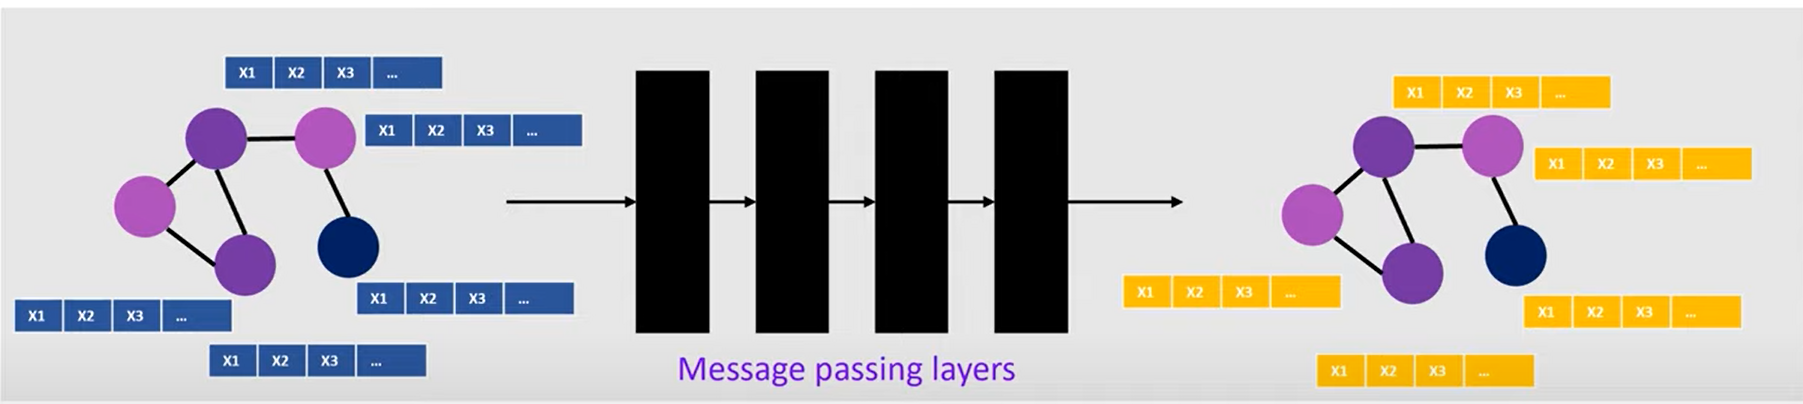
Source: https://www.youtube.com/watch?v=fOctJB4kVlM

## What is going on in Message Passing Layers?
 
The approach of gathering information about the target node's neighboring node and combining them in a certain way to get a new embedding and updating the target node features with these embeddings is called Graph Convolutions. Seen as an extension of the CNN approach to graph data.




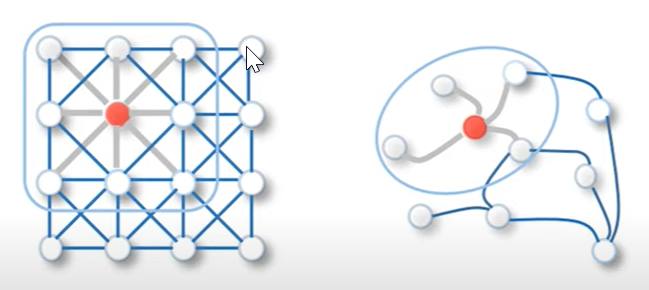

Source: A Comprehensive Survey on Graph Neural Network, Zonghan Wu et. al.,2019

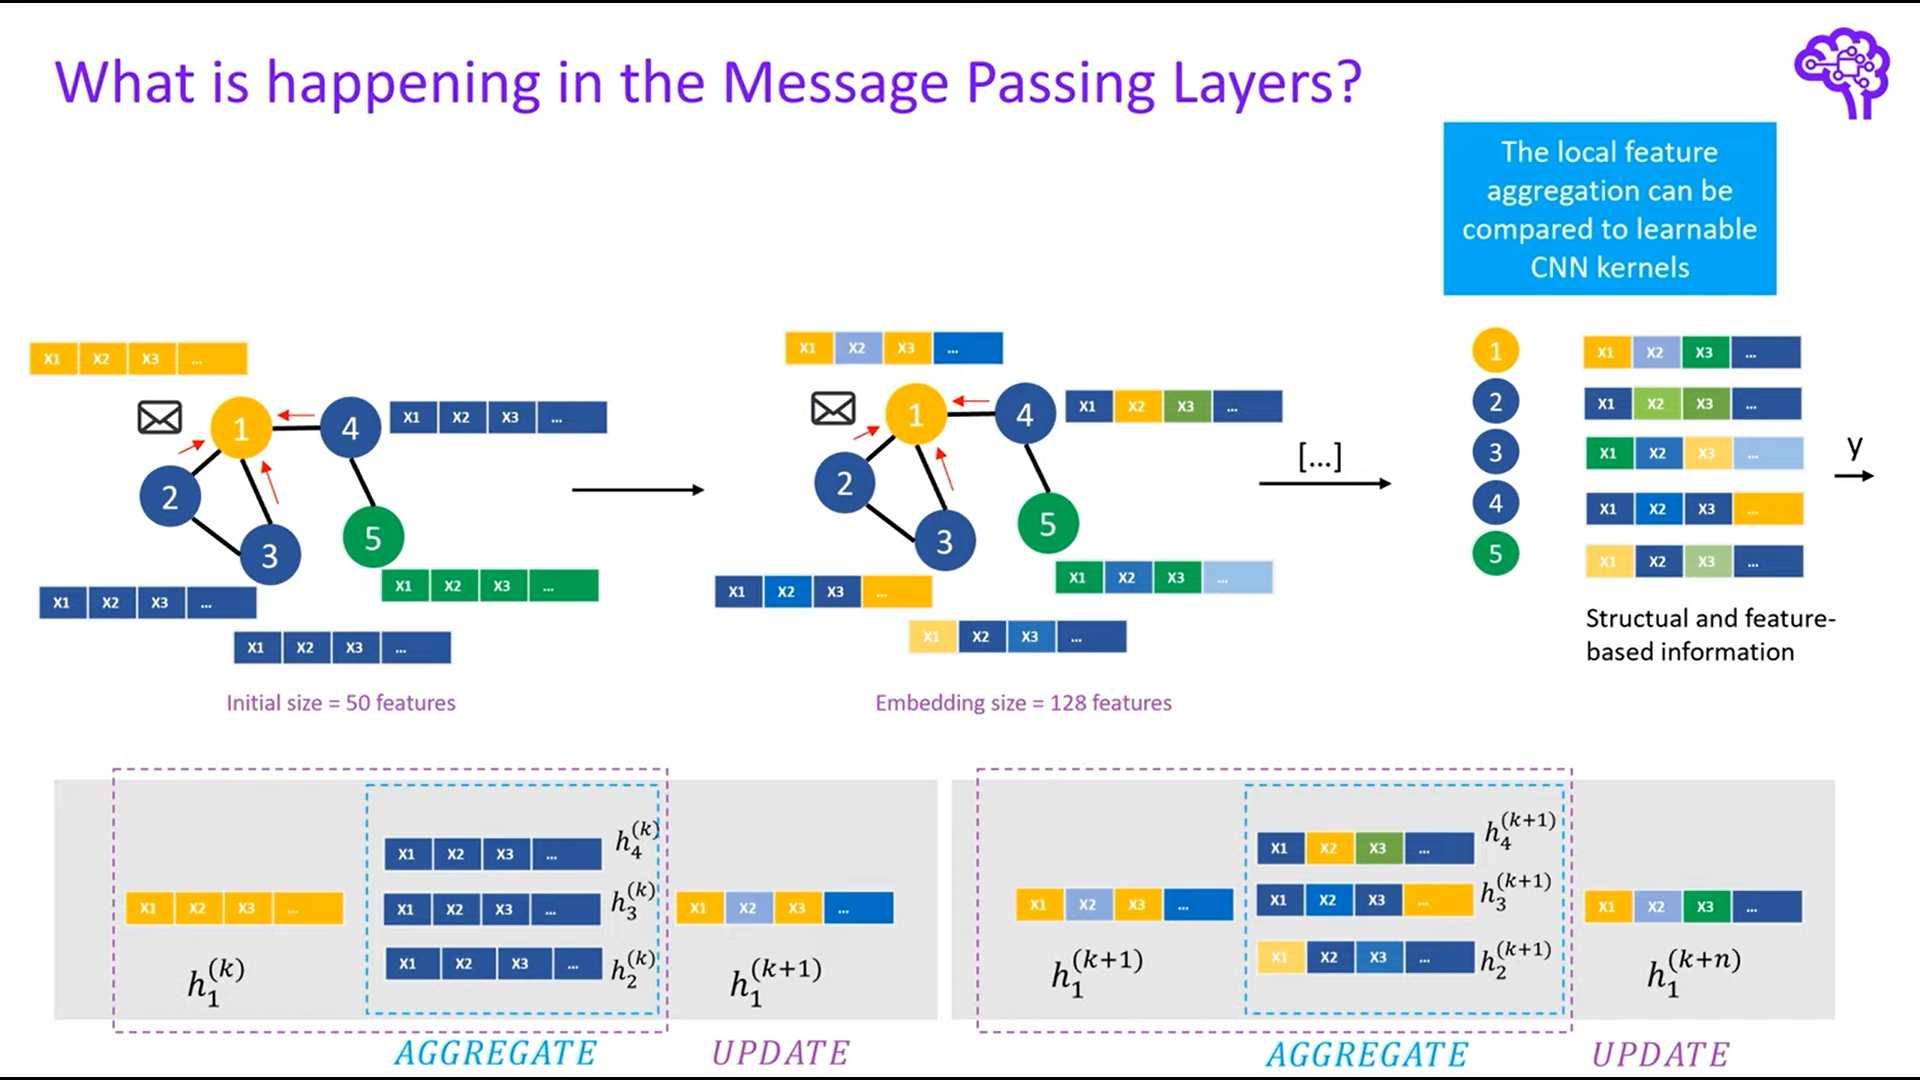

As clearly illustrated in the above image by DeepFindr, during message passing, a target node's neighbouring information is aggregated in a certain way before an update function is used to derive new embeddings for the target node. This is done for all nodes in the graph. A second message passing layer would use the new embeddings to derive new embeddings using the aggregate and update function. Two message passing layers would combine information about a target node's neighbours as well as its neighbour's neighbour. We can then use the embeddings to make predictions. The number of message passing layer is a hyperparameter. Using too many messages passing layer would lead to over-smoothing in which case all nodes become indistinguishable from each other.  

There are different aggregate and update functions have been proposed. Let’s take a look at a few of the proposed functions. 


## The different variants of aggregate and update functions 

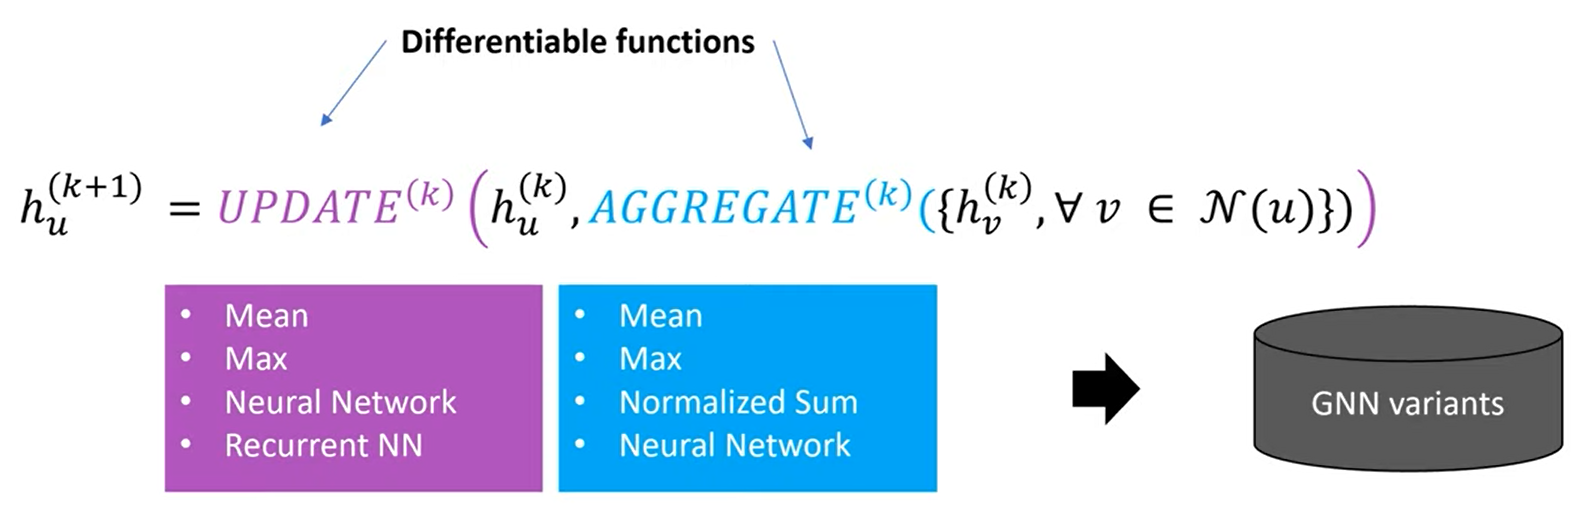

Source: https://youtu.be/ABCGCf8cJOE

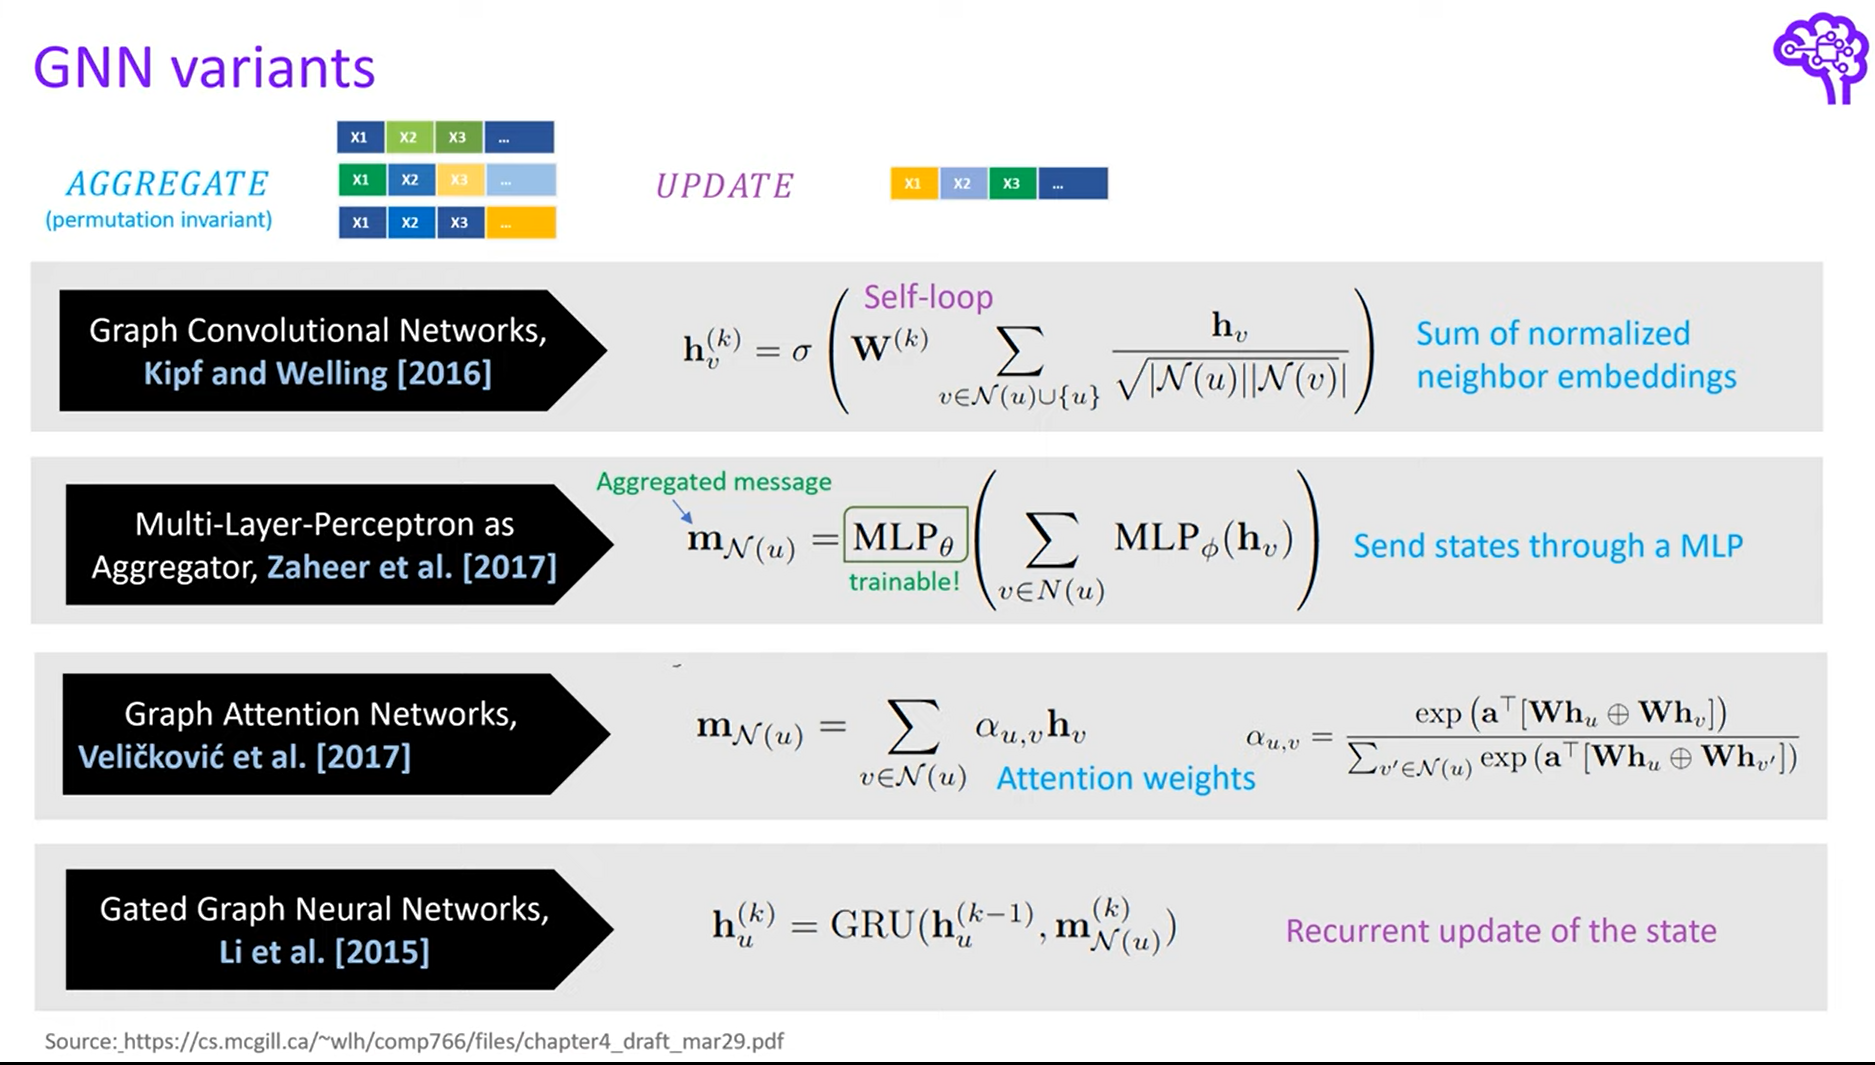

# Hands-on GNN - DeepChem

In [ ]:
#collapse-hide
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e
!pip install --pre deepchem

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3501  100  3501    0     0  20354      0 --:--:-- --:--:-- --:--:-- 20354


add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.10
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit, openmm, pdbfixer
added omnia to channels
added conda-forge to channels
done
conda packages installation finished!


# conda environments:
#
base                  *  /root/miniconda

     |████████████████████████████████| 563kB 8.4MB/s 


DeepChem - a library for life sciences

In [ ]:
#collapse-hide
import deepchem as dc
import numpy as np
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt   

dc.__version__

'2.6.0.dev'

Resources

https://github.com/deepchem/deepchem/tree/master/examples/tutorials

DeepChem offers many different datasets. Let's take a look at the different datasets. 

In [ ]:
#collapse-hide
[method for method in dir(dc.molnet) if "load_" in method ]

['load_Platinum_Adsorption',
 'load_bace_classification',
 'load_bace_regression',
 'load_bandgap',
 'load_bbbc001',
 'load_bbbc002',
 'load_bbbp',
 'load_cell_counting',
 'load_chembl',
 'load_chembl25',
 'load_clearance',
 'load_clintox',
 'load_delaney',
 'load_factors',
 'load_function',
 'load_hiv',
 'load_hopv',
 'load_hppb',
 'load_kaggle',
 'load_kinase',
 'load_lipo',
 'load_mp_formation_energy',
 'load_mp_metallicity',
 'load_muv',
 'load_nci',
 'load_pcba',
 'load_pdbbind',
 'load_perovskite',
 'load_ppb',
 'load_qm7',
 'load_qm8',
 'load_qm9',
 'load_sampl',
 'load_sider',
 'load_sweet',
 'load_thermosol',
 'load_tox21',
 'load_toxcast',
 'load_uspto',
 'load_uv',
 'load_zinc15']

Thats a nice list of datasets. You can read more about the available datasets [here](https://deepchem.readthedocs.io/en/latest/api_reference/moleculenet.html). For our blog going forward, we will work with the [HIV dataset](https://deepchem.readthedocs.io/en/latest/api_reference/moleculenet.html#hiv-datasets).

About the dataset
>The HIV dataset was introduced by the Drug Therapeutics Program (DTP) AIDS Antiviral Screen, which tested the ability to inhibit HIV replication for over 40,000 compounds. Screening results were evaluated and placed into three categories: confirmed inactive (CI),confirmed active (CA) and confirmed moderately active (CM). We further combine the latter two labels, making it a classification task between inactive (CI) and active (CA and CM).

In [ ]:
tasks, datasets, transformers = dc.molnet.load_hiv(featurizer='GraphConv', splitter='random')

DeepChem offers many `featurizers` that allows us to represent the molecules in different ways. In the above example, we are using `GraphConv` as the `featurizer`. This transforms the molecule data in such a way for Graph Convolution Network to use. 

In [ ]:
#tasks states the different tasks in the dataset
tasks

['HIV_active']

In [ ]:
#when we load, the .load_xxx method splits the data into three different datasets - train, valid, and test
train, valid, test = datasets

A dataset contains the following - X (the features), y (the targets), w (the weights)

In [ ]:
train

<DiskDataset X.shape: (32901,), y.shape: (32901, 1), w.shape: (32901, 1), task_names: ['HIV_active']>

When we `featurize` the data using `GraphConv`, it creates a `ConvMol` object for each X. Each sample is of a different shape since each molecule has a different number of atoms.  

In [ ]:
train.X.shape

(32901,)

In [ ]:
train.ids

array(['O=S(=O)(OCCSS(=O)(=O)c1ccccc1)c1ccccc1',
       'CCNCC(O)c1ccc(N)c([N+](=O)[O-])c1.Cl',
       'Cc1c(C(Cc2ccccc2N(C)C(=O)C=CC(=O)O)c2c[nH]c3ccccc23)c2ccccc2n1C',
       ..., 'NC1=NC(c2ccccc2)=CC=C(c2ccccc2)N=N1',
       'OCC1N=C(c2cccs2)OC1c1ccccc1',
       'O=C(O)c1cc(S(=O)(=O)Nc2cc(Cc3cc(NS(=O)(=O)c4ccc(O)c(C(=O)O)c4)c(O)c(C(=O)O)c3)cc(C(=O)O)c2O)ccc1O.[NaH]'],
      dtype=object)

In [ ]:
train.X[0]

We can access the feature data like this. For `train.X[0]`, it is of shape 22 (number of atoms) by 75 (number of features). 

In [ ]:
first = train.X[0]
first.atom_features.shape

(22, 75)

In [ ]:
#here, there are 20 atoms
second = train.X[1]
second.atom_features.shape

(17, 75)

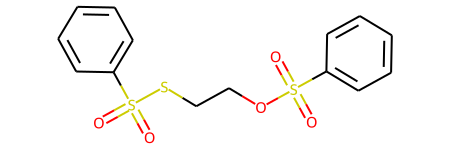

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
first_molecule = Chem.MolFromSmiles(train.ids[0])
first_molecule

In [ ]:
#as we can see, the first molecule has 22 atoms, lets check the second
first_molecule.GetNumAtoms()

22

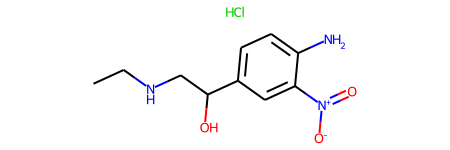

In [ ]:
sec_molecule = Chem.MolFromSmiles(train.ids[1])
sec_molecule

In [ ]:
sec_molecule.GetNumAtoms()

17

Let's build a `GraphConvModel` and fit the data. DeepChem provides an easy way to build and train GCN. We could also build our own GCN which we will see later. 

In [ ]:
#collapse-hide
n_tasks = len(tasks)
model = dc.models.GraphConvModel(n_tasks, mode='classification')
model.fit(train, nb_epoch=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_14:0", shape=(556,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_13:0", shape=(556, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_17:0", shape=(2488,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_16

0.2921682548522949

Let's evaluate our model. Looks like our model overfits.

In [ ]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('Training set score:', model.evaluate(train, [metric], transformers))
print('Test set score:', model.evaluate(test, [metric], transformers))

Training set score: {'roc_auc_score': 0.9867495223607332}
Test set score: {'roc_auc_score': 0.8326334816462736}


In [ ]:
preds = model.predict(test).reshape(4113, 2)

In [ ]:
accuracy = accuracy_score(test.y.reshape(-1), np.argmax(preds, axis=1)); accuracy

0.8655482616095308

In [ ]:
cm = confusion_matrix(test.y.reshape(-1), np.argmax(preds, axis=1))

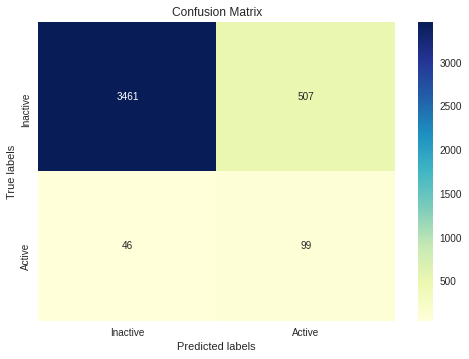

In [ ]:
plt.style.use('seaborn')
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu", fmt=""); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Inactive', 'Active']); 
ax.yaxis.set_ticklabels(['Inactive', 'Active']);

Let's build our own model using DeepChem.

In [ ]:
#collapse-hide
from deepchem.models.layers import GraphConv, GraphPool, GraphGather
import tensorflow as tf
import tensorflow.keras.layers as layers

from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol
import numpy as np

In [ ]:
batch_size = 100

class MyGraphConvModel(tf.keras.Model):

  def __init__(self):
    super(MyGraphConvModel, self).__init__()
    self.gc1 = GraphConv(128, activation_fn=tf.nn.tanh)
    self.batch_norm1 = layers.BatchNormalization()
    self.gp1 = GraphPool()

    self.gc2 = GraphConv(128, activation_fn=tf.nn.tanh)
    self.batch_norm2 = layers.BatchNormalization()
    self.gp2 = GraphPool()

    self.gc3 = GraphConv(128, activation_fn=tf.nn.tanh)
    self.batch_norm3 = layers.BatchNormalization()
    self.gp3 = GraphPool()

    self.dense1 = layers.Dense(256, activation=tf.nn.tanh)
    self.batch_norm3 = layers.BatchNormalization()
    self.readout = GraphGather(batch_size=batch_size, activation_fn=tf.nn.tanh)

    self.dense2 = layers.Dense(n_tasks*2)
    self.logits = layers.Reshape((n_tasks, 2))
    self.softmax = layers.Softmax()

  def call(self, inputs):
    gc1_output = self.gc1(inputs)
    batch_norm1_output = self.batch_norm1(gc1_output)
    gp1_output = self.gp1([batch_norm1_output] + inputs[1:])

    gc2_output = self.gc2([gp1_output] + inputs[1:])
    batch_norm2_output = self.batch_norm1(gc2_output)
    gp2_output = self.gp2([batch_norm2_output] + inputs[1:])

    gc3_output = self.gc3([gp2_output] + inputs[1:])
    batch_norm3_output = self.batch_norm1(gc3_output)
    gp3_output = self.gp3([batch_norm3_output] + inputs[1:])

    dense1_output = self.dense1(gp3_output)
    batch_norm3_output = self.batch_norm3(dense1_output)
    readout_output = self.readout([batch_norm3_output] + inputs[1:])

    logits_output = self.logits(self.dense2(readout_output))
    return self.softmax(logits_output)

In [ ]:
model = dc.models.KerasModel(MyGraphConvModel(), loss=dc.models.losses.CategoricalCrossEntropy())

Let's create a data gererator function and see what is going on in it.

In [ ]:
def data_generator(dataset, epochs=1):
  for ind, (X_b, y_b, w_b, ids_b) in enumerate(dataset.iterbatches(batch_size, epochs,
                                                                   deterministic=False, pad_batches=True)):
    multiConvMol = ConvMol.agglomerate_mols(X_b)
    inputs = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
    for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
      inputs.append(multiConvMol.get_deg_adjacency_lists()[i])
    labels = [to_one_hot(y_b.flatten(), 2).reshape(-1, n_tasks, 2)]
    weights = [w_b]
    yield (inputs, labels, weights)

In [ ]:
for ind, (X_b, y_b, w_b, ids_b) in enumerate(train.iterbatches(20, 1, deterministic=True, pad_batches=True)):
    multiConvMol = ConvMol.agglomerate_mols(X_b)
    inputs = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]

    for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
        inputs.append(multiConvMol.get_deg_adjacency_lists()[i])
    labels = [to_one_hot(y_b.flatten(), 2).reshape(-1, n_tasks, 2)]
    weights = [w_b]
    break

The data generator function `yield` inputs, labels and weights. Labels and weights are straightforward hence let’s break down the inputs. The length of `inputs` is 13. 
 



In [ ]:
len(inputs)

13

The first item is the `atom_features`. It is of shape `(495, 75)`. We are batching 20 molecules, hence the total number of atoms in these 20 molecules is 495. 75 is the feature embedding size.

In [ ]:
inputs[0], inputs[0].shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (495, 75))

The second item in `inputs` is the `deg_slice`. `deg_slice` is a convenient indexing function. Later, we will see that the degree (which indicates the number of connections each atom makes) adjacency list is grouped by their degree i.e. all atoms with 1 degree for all the 20 molecules are grouped together and all atoms with 2 degrees are grouped together and so on. The atoms on the `atom_features` are also arranged by their degree. The `deg_slice` indicates where the different degrees start and ends. For eg, a degree of 1 starts from index 1 and ends at index 93 while the degree of 2 starts from index 94 and ends at index 228.


In [ ]:
multiConvMol.deg_slice

array([[  0,   1],
       [  1,  93],
       [ 94, 228],
       [322, 163],
       [485,   8],
       [493,   2],
       [495,   0],
       [495,   0],
       [495,   0],
       [495,   0],
       [495,   0]])

The next item in the `inputs` is the `membership` of each atoms. It indicates to which molecule each atom belongs.  

In [ ]:
inputs[2]

array([ 1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 14, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18,
       18, 18, 18, 18, 19, 19, 19, 19, 19,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10

In [ ]:
#there are 22 atoms belonging to molecule 0. As we saw previously, the molecule at index 0 in the trainset had 22 atoms
sum(np.array(multiConvMol.membership) == 0)

22

In [ ]:
#there are 17 atoms belonging to molecule 1. As we saw previously, the molecule at index 1 in the trainset had 17 atoms
sum(np.array(multiConvMol.membership) == 1)

17

Items 4 onwards is the `deg_adjacency_lists`. 4th item is the 0 degree atoms, 5th item is the 1 degree atoms and so on.

In [ ]:
len(multiConvMol.get_deg_adjacency_lists())

11

In [ ]:
multiConvMol.get_deg_adjacency_lists()[1]

array([[485],
       [485],
       [486],
       [486],
       [324],
       [328],
       [326],
       [326],
       [108],
       [333],
       [340],
       [337],
       [337],
       [339],
       [332],
       [139],
       [346],
       [352],
       [135],
       [151],
       [360],
       [355],
       [365],
       [365],
       [369],
       [369],
       [191],
       [383],
       [383],
       [385],
       [386],
       [197],
       [389],
       [388],
       [388],
       [221],
       [212],
       [393],
       [224],
       [489],
       [404],
       [412],
       [489],
       [408],
       [411],
       [489],
       [406],
       [405],
       [413],
       [412],
       [415],
       [414],
       [416],
       [418],
       [421],
       [419],
       [426],
       [427],
       [431],
       [424],
       [433],
       [428],
       [435],
       [271],
       [491],
       [270],
       [269],
       [491],
       [266],
       [442],
       [443],
      

In [ ]:
#collapse-hide
model.fit_generator(data_generator(train, epochs=50))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/my_graph_conv_model/graph_pool_4/Reshape_14:0", shape=(459,), dtype=int32), values=Tensor("gradient_tape/my_graph_conv_model/graph_pool_4/Reshape_13:0", shape=(459, 128), dtype=float32), dense_shape=Tensor("gradient_tape/my_graph_conv_model/graph_pool_4/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/my_graph_conv_model/graph_pool_4/Reshape_17:0", shape=(2828,), dtype=int32), values=Tensor("gradient_tape/my_graph_conv_model/graph_pool_4/Reshape_16:0", shape=(2828, 128), dtype=float32), dense_shape=Tensor(

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/my_graph_conv_model/graph_pool_4/Reshape_50:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/my_graph_conv_model/graph_pool_4/Reshape_49:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/my_graph_conv_model/graph_pool_4/Cast_16:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/my_graph_conv_model/graph_pool_4/Reshape_53:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/my_graph_conv_model/graph_pool_4/Reshape_52:0", shape=(None, 128), dtype=float32), dense_shape=Tens

0.6231404113769531

In [ ]:
print('Training set score:', model.evaluate_generator(data_generator(train), [metric], transformers))
print('Test set score:', model.evaluate_generator(data_generator(test), [metric], transformers))

Training set score: {'roc_auc_score': 0.7272946114084287}
Test set score: {'roc_auc_score': 0.6715548288953609}


So our model did poorly than the previous DeepChem's factory method. Likely for this task 2 message passing layer is better. This concludes this blog. I plan to continue my DeepChem journey. Things I plan to do in my future blogs.
 
1. Understand and use different `featurizers` and their corresponding models such as the `WeaveFeaturizer` and `WeaveModel`
2. Work with different `MolNet` datasets
3. Understand the library at a deeper level such as what goes on in `GraphConvModel`, `fit` methods
 